Latent Semantic Analysis (LSA) is a technique used to identify latent concepts/themes/topics contained in a document or set of documents. Compared to a plain-vanilla approach of merely searching for the same key-words that appear in the set of documents to find similar topics, LSA is a more powerful technique for automagically retrieving and identifying relationships between a set of documents that might not be apparent by just reading the documents manually. The way  I think of it is that underlying a document or set of documents potentially exist a common set of latent concepts or topics (I will use both words interchangeably throughout this notebook) that tie those documents together. These topics may or may not be explicitly tagged in the documents with certain key-words or phrases. LSA is a technique to help unearth those latent concepts in order to more visibly see the connections that exist in a set of documents. One could try to do this manually, but it quickly becomes infeasible with more documents, and LSA offers an algorithmic and automated way to identify these clusters of concepts. In addition, the algorithm might pick up on topics and concepts that are missed by human eyes, which to me is very exciting and the ultimate ideal of humans and computers working together. One use-case I'm particularly interested in is topic querying (also called concept searching), in which the user runs a query against a set of documents. The model in turn identifies and retrieves all documents that are conceptually similar to the query even if the documents don't explicitly contain the query term. 

The first step in implementing LSA is to transform the input data(the collection of documents) into a form the computer can deal with. In our case, the first step is to build something called a term-document matrix. Let's call this matrix A. Here's an example of what A would look like.



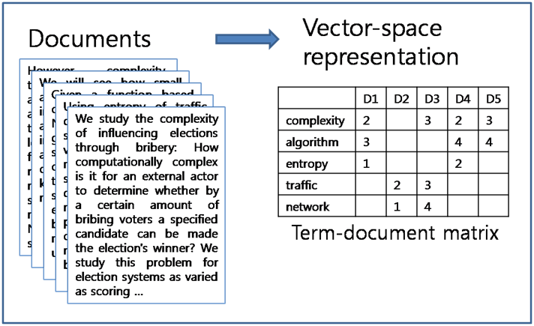

For a toy example of a term-document matrix that we can manipulate and try to implement LSA with, suppose we had the term-document matrix below.

In [ ]:
import pandas as pd
import numpy as np

A = np.array([[1,1,0,1,0,0], 
                      [1,0,1,1,0,0], 
                      [1,1,1,2,1,1], 
                      [0,0,0,1,1,1]])

pd.DataFrame(A, index = ['internet', 'web', 'surfing', 'beach'], columns = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6'])

,D1,D2,D3,D4,D5,D6
internet,1,1,0,1,0,0
web,1,0,1,1,0,0
surfing,1,1,1,2,1,1
beach,0,0,0,1,1,1


This is a matrix where each column is a particular document and the rows are comprised of every unique word that appears in the set of documents. We call this collection of unique words that comprise the entire set of documents the vocabulary. Each element of the matrix indicates the frequency count of a particular word for a particular document(given by which column the element is in). The shape of our matrix A is (mxn), where m is the size of our vocabulary (all the unique words contained in our corpus of documents) and n is the number of documents. Each document is now represented as an m-dimensional vector where each element in the document vector denotes how many times a particular word associated with its row occurred in that specific document. In our toy example above, we have a corpus of 6 documents (the columns) and 4 terms(the rows). This is our matrix A.

Now, Matrix A is a sparse matrix, meaning most entries of the matrix are zero. This is because there are likely to be many words in the vocabulary that are not found in a particular document. 

Before I go on, I'd like to talk about a potential problem that may inhibit the quality of results the model produces. It is a linguistic phenomenon known as **__synonymy__**, in which multiple words can be used to describe the same topic. For example, if I provide the model with the following query: "doctor", I want returned to me all documents that have to do with doctors but may not explicitly contain the query term. Maybe they contain "physician", but not "doctor". 

In our toy example, suppose we provided the query: "web surfing". If we just did a plain-vanilla keyword search across the documents, the model would return just document 1 (D1) beause it contains the term "web surfing", but it would miss document 2 (D2) because it doesn't contain the query term even though the content of D2 ("internet surfing") is conceptually related to our query and thus something we'd want to be identified and retreived for us. The model will fail to catch the relevant documents in this case. The crux of the issue comes down to a mismatch in the user's vocabulary and the vocabulary contained in the documents. So a good information retrieval system has to be robust and flexible enough to understand and satisfy the user's true query intent. 

To help mitigate this problem we want to find another matrix, let's call it **A_k**, that is a rank-reduced approximation of our original matrix A. In other words, we want A_k to be as similar to A as possible (as measured by the minimization of the frobenius norm between A and A_k) so as to retain most of the information in A while being of lower rank. Folding A into a lower rank helps resolve the issue of synonymy by merging the dimensions of terms that are related to each other, enabling it to capture the relationships of terms that have similar meaning. Specifically, we want our new matrix A_k to be rank __k__, where __k__ denotes how many topics we want the model to detect. To do this we use a dimensionality-reduction technique known as singular value decomposition(SVD). It's been proven that you can take any arbitrary matrix and decompose it as the product of 3 component matrices. SVD is the process that decomposes our matrix A as a product of 3 constituent matrices typically denoted as U,S, and V. The general equation is shown in diagram below. The U,S, and V matrices have special properties. S is a diagonal matrix. 



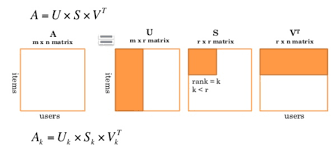

Let's decompose our example matrix A using SVD. The implementation is below.

In [ ]:
A = np.array([[1,1,0,1,0,0], 
                      [1,0,1,1,0,0], 
                      [1,1,1,2,1,1], 
                      [0,0,0,1,1,1]])

#query = 'web surfing'
q = np.array([[0], 
                 [1], 
                 [1], 
                 [0]])



In [ ]:
#Decompose A matrix into U,S, and V

U,S,V = np.linalg.svd(A) 

In [ ]:
U

array([[-3.67332245e-01, -4.69723922e-01,  7.07106781e-01,
        -3.80034813e-01],
       [-3.67332245e-01, -4.69723922e-01, -7.07106781e-01,
        -3.80034813e-01],
       [-7.84844320e-01,  1.22245096e-01,  0.00000000e+00,
         6.07515869e-01],
       [-3.37866006e-01,  7.37411019e-01,  1.66533454e-16,
        -5.84868832e-01]])

In [ ]:
S = np.diag(S)
S

array([[3.8034468 , 0.        , 0.        , 0.        ],
       [0.        , 1.5456788 , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 0.38035436]])

In [ ]:
V

array([[-3.99508364e-01, -3.02929586e-01, -3.02929586e-01,
        -6.94690703e-01, -2.95182339e-01, -2.95182339e-01],
       [-5.28701530e-01, -2.24806619e-01, -2.24806619e-01,
         2.74658404e-02,  5.56167370e-01,  5.56167370e-01],
       [ 5.55111512e-17,  7.07106781e-01, -7.07106781e-01,
        -2.22044605e-16,  1.66533454e-16,  1.66533454e-16],
       [-4.01083233e-01,  5.98076626e-01,  5.98076626e-01,
        -3.41541293e-01,  5.95419399e-02,  5.95419399e-02],
       [ 4.47213595e-01, -2.77555756e-16,  1.38777878e-17,
        -4.47213595e-01,  7.23606798e-01, -2.76393202e-01],
       [ 4.47213595e-01, -2.49800181e-16,  2.77555756e-17,
        -4.47213595e-01, -2.76393202e-01,  7.23606798e-01]])

In [ ]:
#Verify that dot products of U,S, and V return our original A

np.dot(U,S).dot(V[:4, :]).round(5)

array([[ 1.,  1.,  0.,  1., -0., -0.],
       [ 1.,  0.,  1.,  1.,  0.,  0.],
       [ 1.,  1.,  1.,  2.,  1.,  1.],
       [-0., -0.,  0.,  1.,  1.,  1.]])

In [ ]:
#The above matrix and matrix A below match! So A = U*S*V

A

array([[1, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 1, 2, 1, 1],
       [0, 0, 0, 1, 1, 1]])

Now, what having access to the decomposition matrices U,S, and V allows us to do is to generate matrix A_k that is a __rank-reduced__ approximation of our original A. It takes the U,S, and V matrices of the A matrix decomposition and grabs the first __k__ components from each of them. This entails grabbing the first __k__ columns of U, the upper __(k x k)__ part of S (which again, is a diagonal matrix), and the first __k__ rows of V. From that we obtain U_k, S_k, and V_k. Multiply them together and you get A_k, the rank __k__ approximation of A. 

Get rank-k approximation of A. We will choose to use 2 topics, one topic relating to the abstract concept of internet/web surfing and the other on beach surfing. Thus k=2. Our original term document matrix is below for reference.   

In [ ]:
pd.DataFrame(A, index = ['internet', 'web', 'surfing', 'beach'], columns = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6'])

,D1,D2,D3,D4,D5,D6
internet,1,1,0,1,0,0
web,1,0,1,1,0,0
surfing,1,1,1,2,1,1
beach,0,0,0,1,1,1


In [ ]:
#Compute A_k

U_k = U[:,:2]
S_k = S[:2, :2]
V_k = V[:2, :]

A_k = np.dot(U_k, S_k).dot(V_k)

A_k

array([[ 0.94202426,  0.58645072,  0.58645072,  0.95063092,  0.00860666,
         0.00860666],
       [ 0.94202426,  0.58645072,  0.58645072,  0.95063092,  0.00860666,
         0.00860666],
       [ 1.09267883,  0.86180165,  0.86180165,  2.07892039,  0.98624157,
         0.98624157],
       [-0.08922394,  0.13304658,  0.13304658,  0.92402161,  1.01324555,
         1.01324555]])

As you can see, A_k, our approximation of A, looks very similar to the original matrix. It retains the original shape (mxn).  The difference is that it now captured similarities between semantically related terms that might correspond to a concept/topic. But... we're not out of the woods yet. We've mostly solved the problem of synonymy, but in the process we've introduced another problem. While A was a sparse matrix (where most of the entries were zero), A_k is a dense matrix because of the extra information added in when making sure we capture the relationship of words that are related to one another. This makes storing and performing operations on A_k inefficient and infeasible, especially when we're working with large documents. You can imagine how large the (mxn) matrix will be. So how do we deal with this?

 We make the matrix more computationally manageable by instead focusing on the V_k matrix we found earlier, which has size (k x n). V_k is still a dense matrix, but with only __k__ rows, making it much more feasible to work with. V_k gives the representation of the documents in the __k__-dimensional "concept space". They've each been mapped and linearly transformed from their original __m__-dimensions into __k__-dimensions. In other words, each document is now represented as a __k__-dimensional linear combination of the topic vectors.

The V_k we found earlier is shown below. 

In [ ]:
V_k

array([[-0.39950836, -0.30292959, -0.30292959, -0.6946907 , -0.29518234,
        -0.29518234],
       [-0.52870153, -0.22480662, -0.22480662,  0.02746584,  0.55616737,
         0.55616737]])

 So we have our (k x n) dimensional matrix V_k to work with. At long last, we can actually work with this new matrix and use it in many ways depending on your needs. You can compare similarities between the documents, perform document categorization, and discover previously invisible relationships in the documents. 

For purposes of information retrieval where in response to a query all relevant documents conceptually related to the query are returned, we have to do a little bit more processing. Let's represent the vector representation of the user query as __q__. In our example, our query q was: "web surfing". Its vector representation according to our original matrix A is below (obtained just by filling in 1's in the places where the word represented in the row corresponds to the query, and zeros for everything else.)

In [ ]:
#query = 'web surfing'

q = np.array([[0], 
                 [1], 
                 [1], 
                 [0]])


Currently, __q__ exists in the original (m x n) vector space, the same as A and A_k. We have to now translate the user query into the "concept space". Simply take the dot product (q.T *  U_k * S_k) and to obtain q_k. This is the original query's mapping to the __k__-dimensional "concept space". 


In [ ]:
#Translate our query 'q' into the latent "concept space"

q_k = np.dot(q.T, U_k).dot(S_k)

q_k

array([[-4.38224227, -0.53709066]])

Finally, our query and our documents are mapped to the same concept space, allowing for easy comparison.  We can compute similarities (usually measured by something called cosine similarity) between q_k and each of the documents, and then return documents that are closest to our query. Let's do that here. The value next to each document is the measure of similarity between our query and that particular document. The higher the value, the more similar.

In [ ]:
#Take the cosine similarity between query vector and each document

for i in range(V_k.shape[1]):
  print(f"Document {i+1}: {np.dot(q_k, V_k[:,i])/ (np.linalg.norm(q_k)* np.linalg.norm(V_k[:, i]))}")


Document 1: [0.69545568]
Document 2: [0.86956337]
Document 3: [0.86956337]
Document 4: [0.98699223]
Document 5: [0.35787066]
Document 6: [0.35787066]


In [ ]:
pd.DataFrame(A, index = ['internet', 'web', 'surfing', 'beach'], columns = ['D1', 'D2', 'D3', 'D4', 'D5', 'D6'])

,D1,D2,D3,D4,D5,D6
internet,1,1,0,1,0,0
web,1,0,1,1,0,0
surfing,1,1,1,2,1,1
beach,0,0,0,1,1,1


Our model now correctly assigns equal weight to the document (D2) that was relevant to our query. We can choose to return all documents that meet a certain similarity threshold, or run k-means clustering to return all documents that are in the same cluster as the query. This part is quite open-ended, and there are a variety of methods to be used depending on the situation. 

In [ ]:
from sklearn.cluster import KMeans

V_k_means = [[-0.39950836, -0.52870153], 
              [-0.30292959, -0.22480662], 
              [-0.30292959, -0.22480662], 
              [-0.6946907, 0.02746584], 
              [-0.29518234, 0.55616737], 
              [-0.29518234, 0.55616737]]

kmeans = KMeans(n_clusters=2, random_state=0).fit(V_k_means)

In [ ]:
kmeans.predict(q_k)

array([1], dtype=int32)

In [ ]:
kmeans.labels_

array([1, 1, 1, 1, 0, 0], dtype=int32)

#Shortcomings of LSA

There are severe shortcomings of LSA, at least for the results I've gotten while implementing it. For one, this technique doesn't take into account word order. For example, while any human would be able to distinguish between "The dog bit the man", and "The man bit the dog", LSA treats them as semantically identical. So LSA is very naive in this sense. Additionally, it fails to pick up on semantic relatedness of words outside the model's vobaulary. Essentially, the only words the model thinks exists in the universe are those contained in the documents we fed it. For example, if you were curious about the passages in the Bible (KJV) regarding the famous snake that tempted Eve, you'd query "snake". However, you wouldn't get any results because the KJV uses the word "serpent". Nowhere does "snake" show up. I could go down the list of "snake" synonyms and try them one by one until the query "serpent" lands a hit, but I want the computer to return these to me immediately and automatically. If "snake" occurred at least once in the Bible and was thereby added to the model's vocabulary, perhaps LSA would pick up the contextual usage of "snake" and link it to "serpent". So LSA is useful for comparing similarities between the user-provided documents, but is poor at fulfulling the job I want it to do, that being return me all relevant documents related to my query even if the documents don't explicitly contain the query-term.  

#LSA using gensim

In [ ]:
!pip install gensim

In [ ]:
text_corpus = ['internet web surfing', 
               'internet surfing', 
               'web surfing', 
               'internet surfing web surfing beach', 
               'beach surfing', 
               'beach surfing']



In [ ]:
texts = [[word for word in document.lower().split()]
        for document in text_corpus]

texts

[['internet', 'web', 'surfing'],
 ['internet', 'surfing'],
 ['web', 'surfing'],
 ['internet', 'surfing', 'web', 'surfing', 'beach'],
 ['beach', 'surfing'],
 ['beach', 'surfing']]

In [ ]:
from collections import defaultdict

frequency = defaultdict(int)

for text in texts: 
  for token in text: 
    frequency[token] +=1

processed_corpus = [[token for token in text if frequency[token]> 1]
                    for text in texts]

processed_corpus

[['internet', 'web', 'surfing'],
 ['internet', 'surfing'],
 ['web', 'surfing'],
 ['internet', 'surfing', 'web', 'surfing', 'beach'],
 ['beach', 'surfing'],
 ['beach', 'surfing']]

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(processed_corpus)

print(dictionary)

Dictionary(4 unique tokens: ['internet', 'surfing', 'web', 'beach'])


In [ ]:
dictionary.token2id

{'beach': 3, 'internet': 0, 'surfing': 1, 'web': 2}

In [ ]:
bow_corpus = [dictionary.doc2bow(text) for text in processed_corpus]

print(bow_corpus)

[[(0, 1), (1, 1), (2, 1)], [(0, 1), (1, 1)], [(1, 1), (2, 1)], [(0, 1), (1, 2), (2, 1), (3, 1)], [(1, 1), (3, 1)], [(1, 1), (3, 1)]]


In [ ]:
from gensim import models

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

 

In [ ]:
for doc in corpus_tfidf: 
  print(doc)

[(0, 0.7071067811865475), (2, 0.7071067811865475)]
[(0, 1.0)]
[(2, 1.0)]
[(0, 0.5773502691896258), (2, 0.5773502691896258), (3, 0.5773502691896258)]
[(3, 1.0)]
[(3, 1.0)]


In [ ]:
from gensim.models import LsiModel

model = LsiModel(corpus_tfidf, id2word = dictionary, num_topics = 2)

In [ ]:
doc = 'web surfing'
vec_bow = dictionary.doc2bow(doc.lower().split())
vec_tfidf = tfidf[vec_bow]
vec_lsi = model[vec_tfidf]

print(vec_lsi)


[(0, -0.5773502691896257), (1, 0.4082482904638631)]


In [ ]:
from gensim import similarities

#index = similarities.MatrixSimilarity(model[bow_corpus])

index = similarities.MatrixSimilarity(model[corpus_tfidf])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [ ]:
sims = index[vec_lsi]

sims = sorted(enumerate(sims), key=lambda item: -item[1])
for i, s in enumerate(sims):
    print(s, text_corpus[i])

(0, 1.0) internet web surfing
(1, 1.0) internet surfing
(2, 1.0) web surfing
(3, 0.8164966) internet surfing web surfing beach
(4, 0.0) beach surfing
(5, 0.0) beach surfing


In [ ]:
model.print_topics()

[(0, '-0.577*"beach" + -0.577*"web" + -0.577*"internet" + 0.000*"surfing"'),
 (1, '-0.816*"beach" + 0.408*"internet" + 0.408*"web" + -0.000*"surfing"')]